## Aggregate the network with an optimization method

In [1]:
import sys
sys.path.append('../src')
import utils
import models as m

In [2]:
lines_df, nodes_df, wind_df, solar_df = utils.import_data()
TimeSeries = {'wind': wind_df, 'solar': solar_df};

In [3]:
network = utils.Network(nodes_df, TimeSeries, lines_df)

The 'features' dictionary has been created and can be accessed as '.features'
It is a dictionary with keys for each node in range(0, 17).
Each value is a dictionary with the features of that node.

Example structure:
network.features[0].keys() = dict_keys(['position', 'time_series', 'duration_curves', 'correlation'])

Details:
  - Position: A tuple (latitude, longitude) of that node.
  - Time series: A dictionary with keys for each time series type in dict_keys(['wind', 'solar'])
    and values as the time series itself.
  - Duration Curves: A dictionary with keys for each time series type in dict_keys(['wind', 'solar'])
    and values as the duration curve of the time series.
  - Correlation: A dictionary with keys as tuples of types of time series
    and values as correlation factors between those time series.


In [4]:
node_features = network.features;

In [5]:
n_repr = 5
opti = m.AggregationOptimizer(node_features, n_repr)

In [6]:
u_results, z_results = opti.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-06
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 307 rows, 306 columns and 884 nonzeros
Model fingerprint: 0x6e2898fb
Variable types: 0 continuous, 306 integer (306 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 3e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Presolve time: 0.01s
Presolved: 307 rows, 306 columns, 884 nonzeros
Variable types: 0 continuous, 306 integer (306 binary)
Found heuristic solution: objective 12.8144494

Root relaxation: objective 7.939375e+00, 86 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Dep

In [7]:
visuals = utils.Visualization(network, u_results, n_repr, save_fig=True)

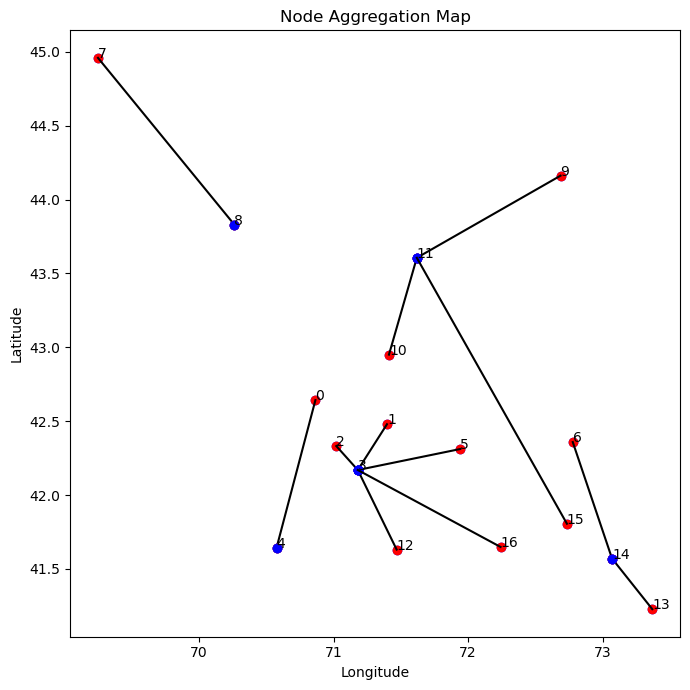

Figure saved as opti_agg_map_17_to_17.png at ../results/


In [8]:
visuals.plot_map()

c:\Users\g630d\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters:
Cluster 0: Nodes [9]
Cluster 1: Nodes [0, 1, 2, 3, 4, 5, 12, 16]
Cluster 2: Nodes [7, 8, 10, 11]
Cluster 3: Nodes [15]
Cluster 4: Nodes [6, 13, 14]

Cluster Centers:
[[44.16137386 72.68527314  0.5500395  ...  0.          0.
  -0.26743494]
 [42.10754546 71.33584336  0.5033199  ...  0.          0.
  -0.13191404]
 [43.83613021 70.63571548  0.50709261 ...  0.          0.
  -0.17269321]
 [41.806053   72.732916    0.6846332  ...  0.          0.
  -0.13497616]
 [41.71920017 73.07026975  0.78855604 ...  0.          0.
  -0.25354705]]


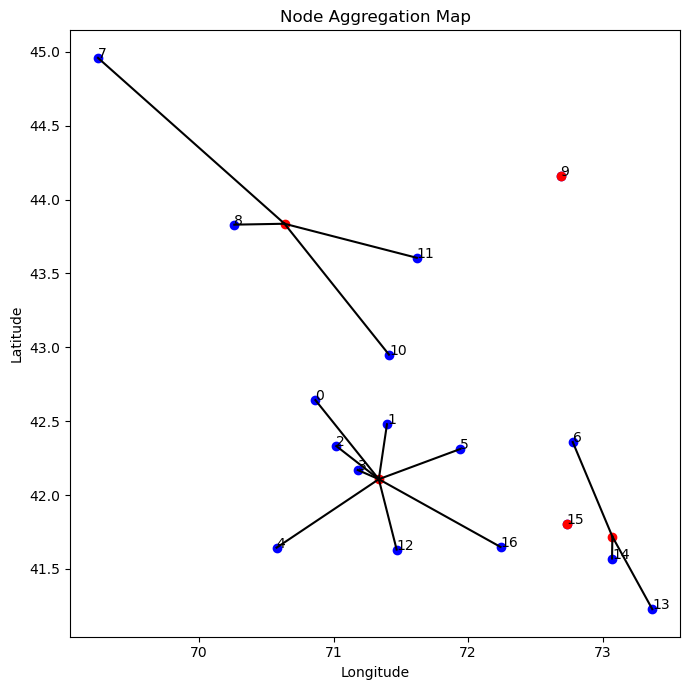

Figure saved as kmeans_agg_map_17_to_5.png at ../results/


In [9]:
aggregator = m.AggregationClustering(node_features, n_repr)
clusters_KMeans, cluster_centers_KMeans, labels_KMeans = aggregator.cluster_KMeans()

print("Clusters:")
for cluster_id, nodes in clusters_KMeans.items():
    print(f"Cluster {cluster_id}: Nodes {nodes}")

print("\nCluster Centers:")
print(cluster_centers_KMeans)

visuals.plot_map(method='kmeans', kmeans_cluster_centers=cluster_centers_KMeans, labels=labels_KMeans, AggregationClustering=aggregator)

Clusters:
Cluster 0: Nodes [1, 2, 3, 5, 12, 16]
Cluster 1: Nodes [6, 13, 14, 15]
Cluster 2: Nodes [0, 4]
Cluster 3: Nodes [7, 8]
Cluster 4: Nodes [9, 10, 11]

Cluster Centers:
[12, 14, 4, 7, 11]


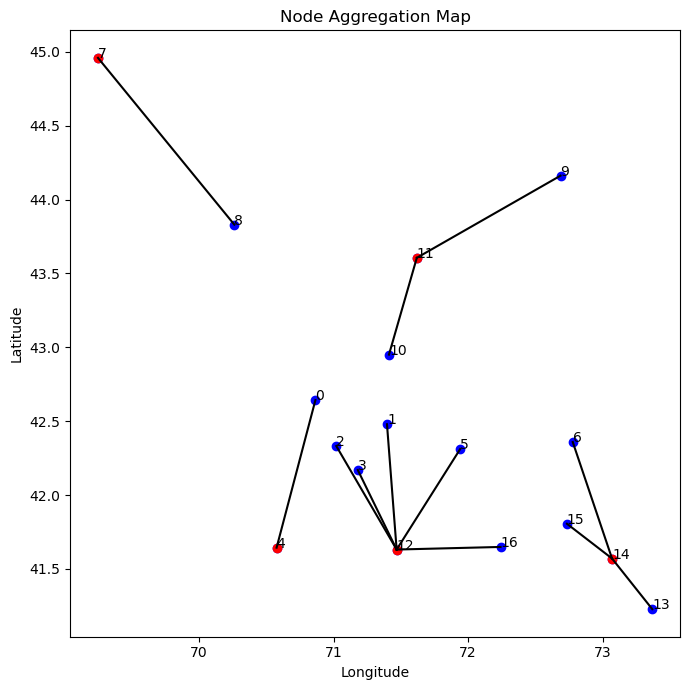

Figure saved as kmedoids_agg_map_17_to_5.png at ../results/


In [10]:
clusters_KMedoids, cluster_centers_KMedoids = aggregator.cluster_KMedoids()

print("Clusters:")
for cluster_id, nodes in clusters_KMedoids.items():
    print(f"Cluster {cluster_id}: Nodes {nodes}")

print("\nCluster Centers:")
print(cluster_centers_KMedoids)

visuals.plot_map(method='kmedoids', kmedoids_medoids=cluster_centers_KMedoids, cluster_mapping=clusters_KMedoids)

In [ ]:
import pandas as pd

demand_hist = pd.read_csv("../DATA/Dev/demand_hist/county_demand_local_hourly_1996.csv")
CF_county = pd.read_csv("../DATA/Dev/county-level-CFs/hist/solar/cf_local_county_1996.csv")
print(CF_county.shape, demand_hist.shape)

AttributeError: module 'pandas' has no attribute 'read'